In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [169]:
df=pd.read_csv('Canada_limpio.csv')
#eliminamos la columna unnamed 
df= df.drop(['Unnamed: 0'], axis=1)
df.head(5)

,listing_url,name,description,neighborhood_overview,picture_url,host_name,host_since,host_response_time,host_response_rate,host_is_superhost,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,https://www.airbnb.com/rooms/1174222393432136530,The Impérial Suite + Parking + AC,Located in the heart of the action on rue Sain...,No se proporcionan detalles,https://a0.muscache.com/pictures/miso/Hosting-...,Johan,2019-01-15,within an hour,100%,t,...,4.95,4.97,5.00,4.70,4.81,10.0,10.0,0.0,0.0,7.82
1,https://www.airbnb.com/rooms/42687485,206 - Les Lofts 1048,Situated in a lovely historic building in the ...,"Old Québec, a UNESCO world heritage treasure, ...",https://a0.muscache.com/pictures/656ff41c-4875...,Reception From Lofts Vieux-Québec,2014-11-13,Desconocido,-%,f,...,5.00,4.92,4.75,5.00,4.83,6.1,4.3,0.0,0.0,0.24
2,https://www.airbnb.com/rooms/1209738868029751192,Appartement complet -Haute-ville,The whole group will enjoy quick and easy acce...,No se proporcionan detalles,https://a0.muscache.com/pictures/hosting/Hosti...,Mathieu,2020-06-05,Desconocido,-%,f,...,5.00,5.00,5.00,4.80,4.70,2.0,1.0,0.0,0.0,2.40
3,https://www.airbnb.com/rooms/50586493,Loft in the old city 12,Luxurious and modern loft in the heart of the ...,No se proporcionan detalles,https://a0.muscache.com/pictures/eeac0775-4692...,Maxime,2015-08-05,within an hour,100%,f,...,4.80,4.71,4.64,4.93,4.50,7.0,7.0,0.0,0.0,0.36
4,https://www.airbnb.com/rooms/138381,Bed & Breakfast La California kudu,This home away from home is a superb pied-à-te...,"Located on chemin Saint-Louis, near the Siller...",https://a0.muscache.com/pictures/3d1d51d0-5e04...,Mary,2011-06-07,within an hour,100%,f,...,4.95,4.94,4.96,4.82,4.92,3.0,0.0,0.0,0.0,1.08


In [170]:
f1=df.iloc[ :  , [8,9,10,13,14,20,24,25,28,40] ]
f1

,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
0,100%,t,t,Entire rental unit,Entire home/apt,f,6.0,1.0,138.0,4.95
1,-%,f,t,Entire loft,Entire home/apt,f,2.0,1.0,229.0,5.00
2,-%,f,f,Entire rental unit,Entire home/apt,t,4.0,1.0,143.2,5.00
3,100%,f,t,Entire loft,Entire home/apt,t,2.0,1.0,143.2,4.80
4,100%,f,t,Private room in bed and breakfast,Private room,f,3.0,1.0,185.0,4.95
...,...,...,...,...,...,...,...,...,...,...
2312,100%,t,t,Entire rental unit,Entire home/apt,f,2.0,1.0,48.0,5.00
2313,-%,f,t,Entire rental unit,Entire home/apt,f,4.0,1.0,101.0,5.00
2314,100%,f,t,Entire condo,Entire home/apt,t,6.0,1.0,143.2,4.52
2315,100%,f,t,Entire rental unit,Entire home/apt,f,2.0,1.0,76.0,4.75


In [171]:
#convertimos string a tipos numéricos
f1['host_is_superhost'] = f1['host_is_superhost'].replace({'f': 0, 't': 1})
f1['host_identity_verified'] = f1['host_identity_verified'].replace({'f': 0, 't': 1})
f1['instant_bookable'] = f1['instant_bookable'].replace({'f': 0, 't': 1})

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
f1['property_type'] = encoder.fit_transform(f1['property_type'])

f1['host_response_rate'] = f1['host_response_rate'].astype(str).str.rstrip('%')
f1['host_response_rate'] = pd.to_numeric(f1['host_response_rate'], errors='coerce').fillna(0)

f1['room_type'] = f1['room_type'].map({
    'Entire home/apt': 1,
    'Private room': 2,
    'Shared room': 3,
    'Hotel room': 4
})

C:\Users\MaFer\AppData\Local\Temp\ipykernel_27984\3436113170.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  f1['host_is_superhost'] = f1['host_is_superhost'].replace({'f': 0, 't': 1})
C:\Users\MaFer\AppData\Local\Temp\ipykernel_27984\3436113170.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f1['host_is_superhost'] = f1['host_is_superhost'].replace({'f': 0, 't': 1})
C:\Users\MaFer\AppData\Local\Temp\ipykernel_27984\3436113170.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be remo

In [ ]:
#f2 = Entire home/apt
f2= f1[(f1["room_type"] == 1)]
#f3 = Private room
f3= f1[(f1["room_type"] == 2)]
#f4 = Shared room
f4= f1[(f1["room_type"] == 3)]
#f5 = Hotel room
f5= f1[(f1["room_type"] == 4)]

<Axes: xlabel='room_type', ylabel='price'>

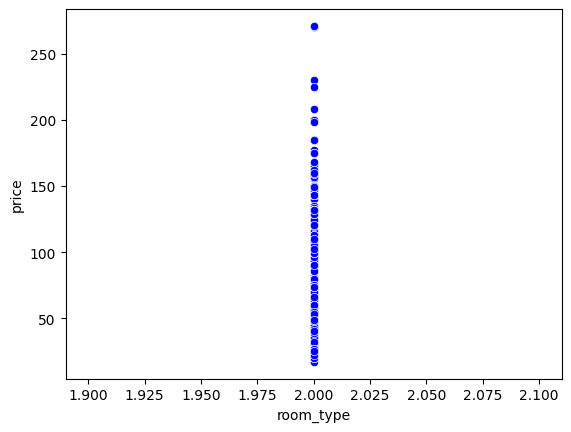

In [173]:
#imprimimos el scatter plot entre la variable dependiente (price) e indpendiente (room_type)
#para observar el comportamiento en su dispersión
from turtle import color

sns.scatterplot(x='room_type',y='price', color="blue", data=f3)
#sns.scatterplot(x='property_type',y='price', color="red", data=f2)

<Axes: xlabel='host_response_rate', ylabel='price'>

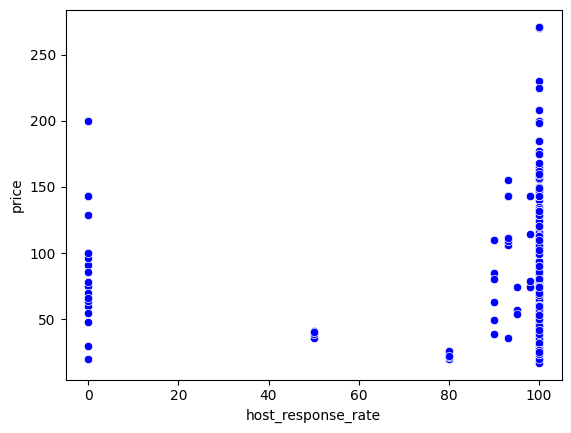

In [174]:
#imprimimos el scatter plot entre la variable dependiente (price) e indpendiente (room_type)
#para observar el comportamiento en su dispersión
from turtle import color

sns.scatterplot(x='host_response_rate',y='price', color="blue", data=f3)
#sns.scatterplot(x='property_type',y='price', color="red", data=f2)

<Axes: xlabel='host_is_superhost', ylabel='price'>

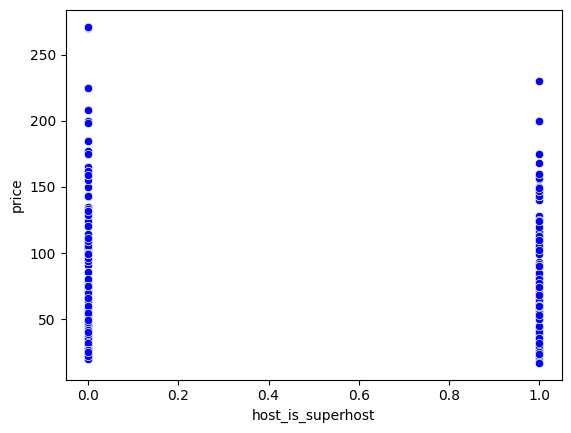

In [175]:
#imprimimos el scatter plot entre la variable dependiente (price) e indpendiente (room_type)
#para observar el comportamiento en su dispersión
from turtle import color

sns.scatterplot(x='host_is_superhost',y='price', color="blue", data=f3)
#sns.scatterplot(x='property_type',y='price', color="red", data=f2)

<Axes: xlabel='host_identity_verified', ylabel='price'>

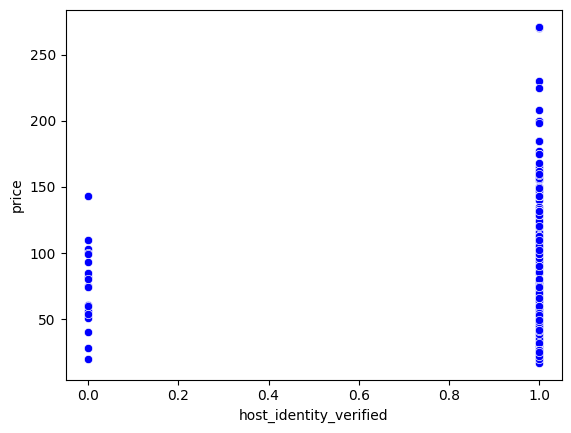

In [176]:
#imprimimos el scatter plot entre la variable dependiente (price) e indpendiente (room_type)
#para observar el comportamiento en su dispersión
from turtle import color

sns.scatterplot(x='host_identity_verified',y='price', color="blue", data=f3)
#sns.scatterplot(x='property_type',y='price', color="red", data=f2)

<Axes: xlabel='instant_bookable', ylabel='price'>

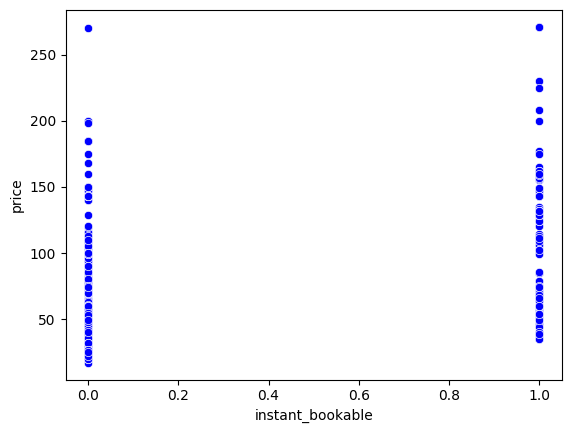

In [177]:
#imprimimos el scatter plot entre la variable dependiente (price) e indpendiente (room_type)
#para observar el comportamiento en su dispersión
from turtle import color

sns.scatterplot(x='instant_bookable',y='price', color="blue", data=f3)
#sns.scatterplot(x='property_type',y='price', color="red", data=f2)

<Axes: xlabel='bathrooms', ylabel='accommodates'>

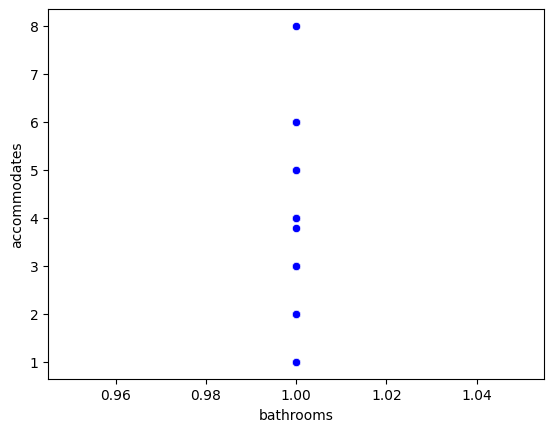

In [178]:
#imprimimos el scatter plot entre la variable dependiente (price) e indpendiente (room_type)
#para observar el comportamiento en su dispersión
from turtle import color

sns.scatterplot(x='bathrooms',y='accommodates', color="blue", data=f3)
#sns.scatterplot(x='property_type',y='price', color="red", data=f2)

<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

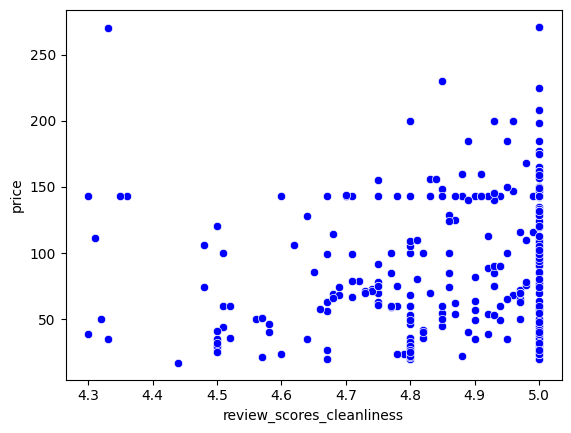

In [179]:
#imprimimos el scatter plot entre la variable dependiente (price) e indpendiente (room_type)
#para observar el comportamiento en su dispersión
from turtle import color

sns.scatterplot(x='review_scores_cleanliness',y='price', color="blue", data=f3)
#sns.scatterplot(x='property_type',y='price', color="red", data=f2)


In [180]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= f3 [['room_type']]
Vars_Dep= f3 ['price']

In [181]:
Vars_Indep2= f3 [['host_response_rate']]
Vars_Dep2= f3 ['price']

In [182]:
Vars_Indep3= f3 [['host_is_superhost']]
Vars_Dep3= f3 ['price']

In [183]:
Vars_Indep4= f3 [['host_identity_verified']]
Vars_Dep4= f3 ['price']

In [184]:
Vars_Indep5= f3 [['instant_bookable']]
Vars_Dep5= f3 ['price']

In [185]:
Vars_Indep6= f3 [['bathrooms']]
Vars_Dep6= f3 ['accommodates']

In [186]:
Vars_Indep7= f3 [['review_scores_cleanliness']]
Vars_Dep7= f3 ['price']

In [187]:
Vars_Indep8= f3 [['property_type']]
Vars_Dep8= f3 ['price']

In [188]:
#Se definie model (para room_type) como función regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [189]:
#Se definie model (para host_response_rate) como función regresión lineal
from sklearn.linear_model import LinearRegression
model2= LinearRegression()

In [190]:
#Se definie model (para host_is_superhost) como función regresión lineal
from sklearn.linear_model import LinearRegression
model3= LinearRegression()

In [191]:
#Se definie model (para host_identity_verified) como función regresión lineal
from sklearn.linear_model import LinearRegression
model4= LinearRegression()

In [192]:
#Se definie model (para instant_bookable) como función regresión lineal
from sklearn.linear_model import LinearRegression
model5= LinearRegression()

In [193]:
#Se definie model (para bathrooms) como función regresión lineal
from sklearn.linear_model import LinearRegression
model6= LinearRegression()

In [194]:
#Se definie model (para review_scores_cleanliness) como función regresión lineal
from sklearn.linear_model import LinearRegression
model7= LinearRegression()

In [195]:
#Se definie model (para property_type) como función regresión lineal
from sklearn.linear_model import LinearRegression
model8= LinearRegression()

In [196]:
#Verficamos la función relacionada al modela
type(model)

sklearn.linear_model._base.LinearRegression

In [197]:
#Verficamos la función relacionada al modela
type(model2)

sklearn.linear_model._base.LinearRegression

In [198]:
#Verficamos la función relacionada al modela
type(model3)

sklearn.linear_model._base.LinearRegression

In [199]:
#Verficamos la función relacionada al modela
type(model4)

sklearn.linear_model._base.LinearRegression

In [200]:
#Verficamos la función relacionada al modela
type(model5)

sklearn.linear_model._base.LinearRegression

In [201]:
#Verficamos la función relacionada al modela
type(model6)

sklearn.linear_model._base.LinearRegression

In [202]:
#Verficamos la función relacionada al modela
type(model7)

sklearn.linear_model._base.LinearRegression

In [203]:
#Verficamos la función relacionada al modela
type(model8)

sklearn.linear_model._base.LinearRegression

In [204]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Vars_Dep)

LinearRegression()

In [205]:
#Ajustamos el modelo con las variables antes declaradas
model2.fit(X=Vars_Indep2, y=Vars_Dep2)

LinearRegression()

In [206]:
#Ajustamos el modelo con las variables antes declaradas
model3.fit(X=Vars_Indep3, y=Vars_Dep3)

LinearRegression()

In [207]:
#Ajustamos el modelo con las variables antes declaradas
model4.fit(X=Vars_Indep4, y=Vars_Dep4)

LinearRegression()

In [208]:
#Ajustamos el modelo con las variables antes declaradas
model5.fit(X=Vars_Indep5, y=Vars_Dep5)

LinearRegression()

In [209]:
#Ajustamos el modelo con las variables antes declaradas
model6.fit(X=Vars_Indep6, y=Vars_Dep6)

LinearRegression()

In [210]:
#Ajustamos el modelo con las variables antes declaradas
model7.fit(X=Vars_Indep7, y=Vars_Dep7)

LinearRegression()

In [211]:
#Ajustamos el modelo con las variables antes declaradas
model8.fit(X=Vars_Indep8, y=Vars_Dep8)

LinearRegression()

In [212]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['room_type'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.]),
 'rank_': 0,
 'singular_': array([0.]),
 'intercept_': np.float64(92.21789137380193)}

In [213]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model2.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_response_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.01131851]),
 'rank_': 1,
 'singular_': array([509.33117204]),
 'intercept_': np.float64(93.23095186809611)}

In [214]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model3.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_is_superhost'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.30158178]),
 'rank_': 1,
 'singular_': array([8.78388009]),
 'intercept_': np.float64(92.35085714285717)}

In [215]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model4.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_identity_verified'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([18.93576799]),
 'rank_': 1,
 'singular_': array([4.22452901]),
 'intercept_': np.float64(74.43157894736848)}

In [216]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model5.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['instant_bookable'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([38.21616814]),
 'rank_': 1,
 'singular_': array([8.49732151]),
 'intercept_': np.float64(78.42100000000002)}

In [217]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model6.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['bathrooms'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.]),
 'rank_': 0,
 'singular_': array([0.]),
 'intercept_': np.float64(2.184664536741214)}

In [218]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model7.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([73.59536378]),
 'rank_': 1,
 'singular_': array([2.95130274]),
 'intercept_': np.float64(-265.59430267255664)}

In [219]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model8.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['property_type'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([4.9703692]),
 'rank_': 1,
 'singular_': array([79.78877867]),
 'intercept_': np.float64(-49.4296909219747)}

Modelo matemático: y= 0.0 + 125.132 <- Este caso especiífico es de room_type

In [220]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pread= model.predict(X=df[['alcohol','speeding']])
y_pred= model.predict(X=f3[['room_type']])
y_pred

array([92.21789137, 92.21789137, 92.21789137, 92.21789137, 92.21789137,
       92.21789137, 92.21789137, 92.21789137, 92.21789137, 92.21789137,
       92.21789137, 92.21789137, 92.21789137, 92.21789137, 92.21789137,
       92.21789137, 92.21789137, 92.21789137, 92.21789137, 92.21789137,
       92.21789137, 92.21789137, 92.21789137, 92.21789137, 92.21789137,
       92.21789137, 92.21789137, 92.21789137, 92.21789137, 92.21789137,
       92.21789137, 92.21789137, 92.21789137, 92.21789137, 92.21789137,
       92.21789137, 92.21789137, 92.21789137, 92.21789137, 92.21789137,
       92.21789137, 92.21789137, 92.21789137, 92.21789137, 92.21789137,
       92.21789137, 92.21789137, 92.21789137, 92.21789137, 92.21789137,
       92.21789137, 92.21789137, 92.21789137, 92.21789137, 92.21789137,
       92.21789137, 92.21789137, 92.21789137, 92.21789137, 92.21789137,
       92.21789137, 92.21789137, 92.21789137, 92.21789137, 92.21789137,
       92.21789137, 92.21789137, 92.21789137, 92.21789137, 92.21

In [221]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pread= model.predict(X=df[['alcohol','speeding']])
y_pred2= model2.predict(X=f3[['host_response_rate']])
y_pred2

array([92.09910131, 92.32547142, 93.23095187, 92.09910131, 92.09910131,
       92.09910131, 93.23095187, 92.09910131, 93.23095187, 92.09910131,
       92.09910131, 92.09910131, 92.17833085, 92.09910131, 92.09910131,
       92.09910131, 92.09910131, 92.09910131, 92.09910131, 92.09910131,
       92.09910131, 92.09910131, 92.09910131, 92.09910131, 92.17833085,
       92.09910131, 92.09910131, 92.09910131, 92.09910131, 92.09910131,
       92.09910131, 92.09910131, 92.09910131, 92.32547142, 92.09910131,
       92.09910131, 92.09910131, 92.09910131, 92.09910131, 93.23095187,
       92.09910131, 92.09910131, 92.09910131, 92.09910131, 92.09910131,
       92.12173832, 92.12173832, 92.12173832, 92.12173832, 92.12173832,
       93.23095187, 92.12173832, 92.12173832, 93.23095187, 93.23095187,
       92.09910131, 92.09910131, 92.09910131, 92.17833085, 93.23095187,
       92.09910131, 92.09910131, 92.17833085, 92.09910131, 92.09910131,
       92.09910131, 92.09910131, 92.09910131, 92.09910131, 92.21

In [222]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pread= model.predict(X=df[['alcohol','speeding']])
y_pred3= model3.predict(X=f3[['host_is_superhost']])
y_pred3

array([92.35085714, 92.35085714, 92.35085714, 92.35085714, 92.35085714,
       92.04927536, 92.35085714, 92.35085714, 92.35085714, 92.04927536,
       92.35085714, 92.35085714, 92.35085714, 92.35085714, 92.35085714,
       92.35085714, 92.04927536, 92.04927536, 92.35085714, 92.04927536,
       92.35085714, 92.35085714, 92.35085714, 92.35085714, 92.35085714,
       92.04927536, 92.04927536, 92.04927536, 92.35085714, 92.04927536,
       92.35085714, 92.35085714, 92.35085714, 92.35085714, 92.35085714,
       92.04927536, 92.04927536, 92.35085714, 92.35085714, 92.35085714,
       92.35085714, 92.04927536, 92.35085714, 92.35085714, 92.35085714,
       92.35085714, 92.35085714, 92.35085714, 92.35085714, 92.35085714,
       92.35085714, 92.35085714, 92.35085714, 92.04927536, 92.35085714,
       92.04927536, 92.04927536, 92.04927536, 92.35085714, 92.35085714,
       92.04927536, 92.35085714, 92.35085714, 92.35085714, 92.04927536,
       92.04927536, 92.04927536, 92.04927536, 92.04927536, 92.35

In [223]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pread= model.predict(X=df[['alcohol','speeding']])
y_pred4= model4.predict(X=f3[['host_identity_verified']])
y_pred4

array([93.36734694, 93.36734694, 93.36734694, 93.36734694, 93.36734694,
       93.36734694, 93.36734694, 93.36734694, 93.36734694, 93.36734694,
       93.36734694, 93.36734694, 93.36734694, 93.36734694, 93.36734694,
       93.36734694, 93.36734694, 93.36734694, 93.36734694, 93.36734694,
       93.36734694, 93.36734694, 74.43157895, 93.36734694, 93.36734694,
       93.36734694, 74.43157895, 93.36734694, 74.43157895, 93.36734694,
       93.36734694, 93.36734694, 93.36734694, 93.36734694, 93.36734694,
       93.36734694, 93.36734694, 93.36734694, 93.36734694, 93.36734694,
       93.36734694, 93.36734694, 93.36734694, 74.43157895, 93.36734694,
       93.36734694, 93.36734694, 93.36734694, 93.36734694, 93.36734694,
       93.36734694, 93.36734694, 93.36734694, 93.36734694, 93.36734694,
       93.36734694, 93.36734694, 93.36734694, 93.36734694, 74.43157895,
       93.36734694, 93.36734694, 93.36734694, 93.36734694, 93.36734694,
       93.36734694, 93.36734694, 93.36734694, 93.36734694, 93.36

In [224]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pread= model.predict(X=df[['alcohol','speeding']])
y_pred5= model5.predict(X=f3[['instant_bookable']])
y_pred5

array([ 78.421     ,  78.421     , 116.63716814,  78.421     ,
       116.63716814,  78.421     , 116.63716814,  78.421     ,
        78.421     ,  78.421     ,  78.421     , 116.63716814,
       116.63716814,  78.421     ,  78.421     ,  78.421     ,
        78.421     ,  78.421     ,  78.421     ,  78.421     ,
        78.421     , 116.63716814,  78.421     , 116.63716814,
        78.421     ,  78.421     ,  78.421     ,  78.421     ,
        78.421     ,  78.421     ,  78.421     ,  78.421     ,
        78.421     ,  78.421     ,  78.421     ,  78.421     ,
       116.63716814, 116.63716814, 116.63716814,  78.421     ,
        78.421     ,  78.421     , 116.63716814,  78.421     ,
       116.63716814, 116.63716814, 116.63716814, 116.63716814,
       116.63716814, 116.63716814,  78.421     , 116.63716814,
       116.63716814,  78.421     ,  78.421     , 116.63716814,
       116.63716814, 116.63716814, 116.63716814,  78.421     ,
       116.63716814, 116.63716814, 116.63716814,  78.42

In [225]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pread= model.predict(X=df[['alcohol','speeding']])
y_pred6= model6.predict(X=f3[['bathrooms']])
y_pred6

array([2.18466454, 2.18466454, 2.18466454, 2.18466454, 2.18466454,
       2.18466454, 2.18466454, 2.18466454, 2.18466454, 2.18466454,
       2.18466454, 2.18466454, 2.18466454, 2.18466454, 2.18466454,
       2.18466454, 2.18466454, 2.18466454, 2.18466454, 2.18466454,
       2.18466454, 2.18466454, 2.18466454, 2.18466454, 2.18466454,
       2.18466454, 2.18466454, 2.18466454, 2.18466454, 2.18466454,
       2.18466454, 2.18466454, 2.18466454, 2.18466454, 2.18466454,
       2.18466454, 2.18466454, 2.18466454, 2.18466454, 2.18466454,
       2.18466454, 2.18466454, 2.18466454, 2.18466454, 2.18466454,
       2.18466454, 2.18466454, 2.18466454, 2.18466454, 2.18466454,
       2.18466454, 2.18466454, 2.18466454, 2.18466454, 2.18466454,
       2.18466454, 2.18466454, 2.18466454, 2.18466454, 2.18466454,
       2.18466454, 2.18466454, 2.18466454, 2.18466454, 2.18466454,
       2.18466454, 2.18466454, 2.18466454, 2.18466454, 2.18466454,
       2.18466454, 2.18466454, 2.18466454, 2.18466454, 2.18466

In [226]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pread= model.predict(X=df[['alcohol','speeding']])
y_pred7= model7.predict(X=f3[['review_scores_cleanliness']])
y_pred7

array([ 98.70274803,  87.66344346,  85.45558255,  70.00055616,
        66.32078797, 102.38251622, 102.38251622, 102.38251622,
       102.38251622,  78.09604617,  94.2870262 , 102.38251622,
        74.41627798,  95.02297984,  52.33766885,  97.96679439,
        86.19153619,  97.96679439, 102.38251622,  99.43870167,
        83.98367527, 102.38251622,  87.66344346, 102.38251622,
       102.38251622, 102.38251622, 102.38251622, 100.1746553 ,
        78.09604617,  96.49488712, 102.38251622,  87.66344346,
        98.70274803,  70.73650979,  87.66344346,  97.23084075,
        97.23084075,  70.73650979,  65.58483433, 102.38251622,
        87.66344346,  87.66344346,  95.02297984, 102.38251622,
        77.36009253,  80.30390708,  72.94437071,  93.55107256,
        64.11292705,  78.83199981,  89.13535074,  79.56795345,
        81.77581436,  55.2814834 , 102.38251622, 102.38251622,
       102.38251622,  89.87130438,  64.11292705, 102.38251622,
        75.88818526, 102.38251622,  67.0567416 , 102.38

In [227]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pread= model.predict(X=df[['alcohol','speeding']])
y_pred8= model8.predict(X=f3[['property_type']])
y_pred8

array([ 45.00732387,  79.79990826,  94.71101586, 104.65175426,
       104.65175426,  74.82953906, 129.50360026, 104.65175426,
       129.50360026,  79.79990826,  45.00732387, 129.50360026,
        84.77027746, 129.50360026,  99.68138506,  94.71101586,
        89.74064666, 104.65175426,  79.79990826,  79.79990826,
       129.50360026, 129.50360026,  79.79990826, 129.50360026,
       129.50360026,  94.71101586,  64.88880066,  64.88880066,
        79.79990826,  79.79990826,  94.71101586,  79.79990826,
        94.71101586,  79.79990826,  94.71101586, 104.65175426,
        79.79990826, 104.65175426, 129.50360026,  79.79990826,
        79.79990826,  79.79990826,  94.71101586,  94.71101586,
       104.65175426,  84.77027746,  84.77027746,  84.77027746,
        84.77027746,  84.77027746,  94.71101586,  84.77027746,
        84.77027746, 129.50360026,  94.71101586, 129.50360026,
       129.50360026, 129.50360026,  84.77027746, 129.50360026,
        94.71101586, 129.50360026,  79.79990826,  94.71

In [228]:
# Crear una copia de f3 antes de modificarlo
f3_copy = f3.copy()

In [229]:
#Insertamos la columna de predicciones en el Dataframe
f3.insert(0, 'Pred_room', y_pred)
f3

,Pred_room,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
4,92.217891,100.0,0,1,19,2,0,3.0,1.0,185.0,4.95
5,92.217891,80.0,0,1,26,2,0,1.0,1.0,20.0,4.80
6,92.217891,0.0,0,1,29,2,1,3.0,1.0,100.0,4.77
12,92.217891,100.0,0,1,31,2,0,2.0,1.0,50.0,4.56
13,92.217891,100.0,0,1,31,2,1,2.0,1.0,60.0,4.51
...,...,...,...,...,...,...,...,...,...,...,...
2300,92.217891,100.0,1,1,26,2,1,2.0,1.0,99.0,5.00
2301,92.217891,100.0,1,1,26,2,1,2.0,1.0,102.0,5.00
2302,92.217891,100.0,1,1,29,2,0,2.0,1.0,53.0,4.93
2304,92.217891,90.0,0,1,29,2,0,2.0,1.0,49.0,4.80


In [230]:
# Insertamos las columnas de predicciones en la copia
f3_copy.insert(0, 'Pred_response', y_pred2)
f3_copy.insert(0, 'Pred_superhost', y_pred3)
f3_copy.insert(0, 'Pred_identity', y_pred4)
f3_copy.insert(0, 'Pred_bookable', y_pred5)
f3_copy.insert(0, 'Pred_bathrooms', y_pred6)
f3_copy.insert(0, 'Pred_cleanliness', y_pred7)
f3_copy.insert(0, 'Pred_property', y_pred8)

<Axes: xlabel='room_type', ylabel='price'>

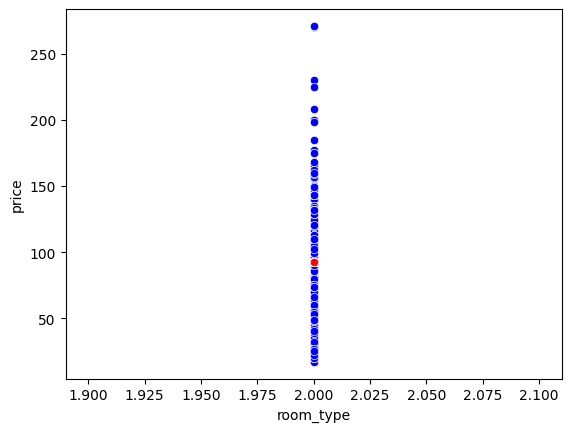

In [231]:
#Visualizamos la gráfica comprativa entre el total real y el total predecido
sns.scatterplot(x='room_type', y='price', color="blue", data = f3)
sns.scatterplot(x='room_type', y='Pred_room', color="red", data = f3)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data = df)

<Axes: xlabel='host_response_rate', ylabel='price'>

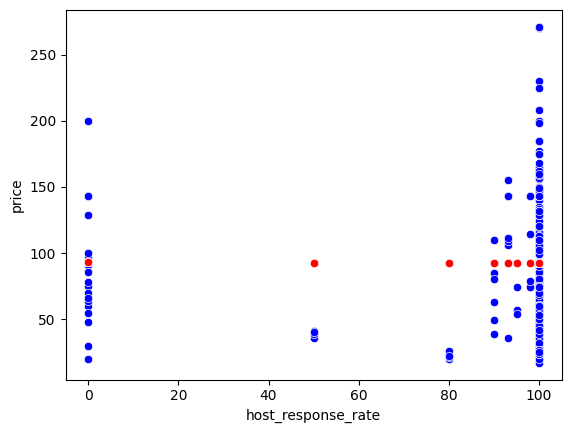

In [232]:
#Visualizamos la gráfica comprativa entre el total real y el total predecido
sns.scatterplot(x='host_response_rate', y='price', color="blue", data = f3_copy)
sns.scatterplot(x='host_response_rate', y='Pred_response', color="red", data = f3_copy)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data = df)

<Axes: xlabel='host_is_superhost', ylabel='price'>

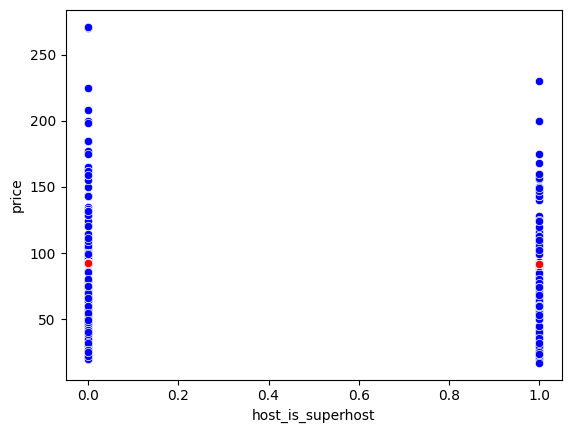

In [233]:
#Visualizamos la gráfica comprativa entre el total real y el total predecido
sns.scatterplot(x='host_is_superhost', y='price', color="blue", data = f3_copy)
sns.scatterplot(x='host_is_superhost', y='Pred_superhost', color="red", data = f3_copy)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data = df)

<Axes: xlabel='host_identity_verified', ylabel='price'>

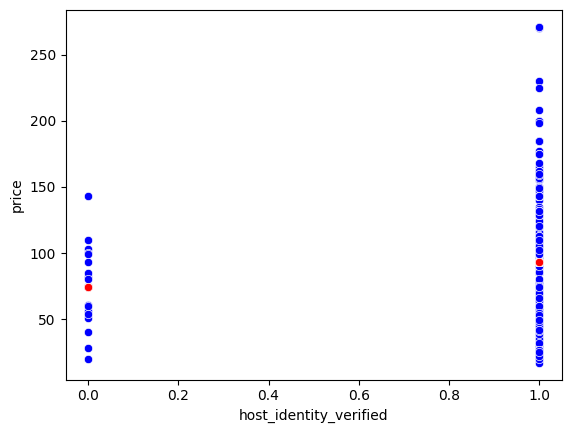

In [234]:
#Visualizamos la gráfica comprativa entre el total real y el total predecido
sns.scatterplot(x='host_identity_verified', y='price', color="blue", data = f3_copy)
sns.scatterplot(x='host_identity_verified', y='Pred_identity', color="red", data = f3_copy)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data = df)

<Axes: xlabel='instant_bookable', ylabel='price'>

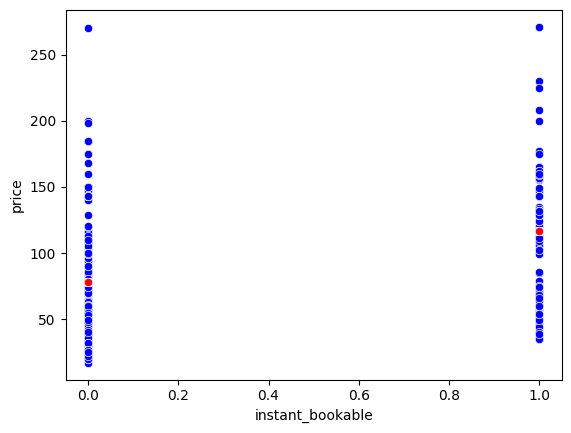

In [235]:
#Visualizamos la gráfica comprativa entre el total real y el total predecido
sns.scatterplot(x='instant_bookable', y='price', color="blue", data = f3_copy)
sns.scatterplot(x='instant_bookable', y='Pred_bookable', color="red", data = f3_copy)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data = df)

<Axes: xlabel='bathrooms', ylabel='accommodates'>

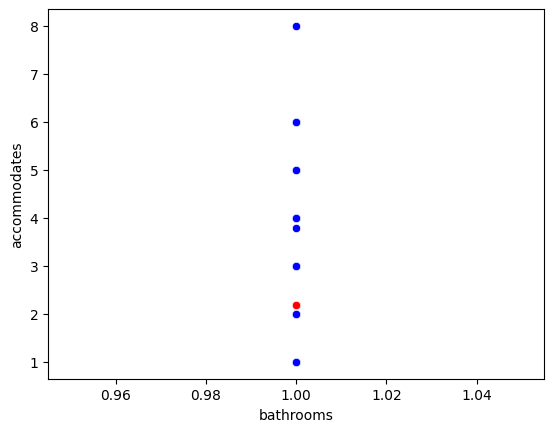

In [236]:
#Visualizamos la gráfica comprativa entre el total real y el total predecido
sns.scatterplot(x='bathrooms', y='accommodates', color="blue", data = f3_copy)
sns.scatterplot(x='bathrooms', y='Pred_bathrooms', color="red", data = f3_copy)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data = df)

<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

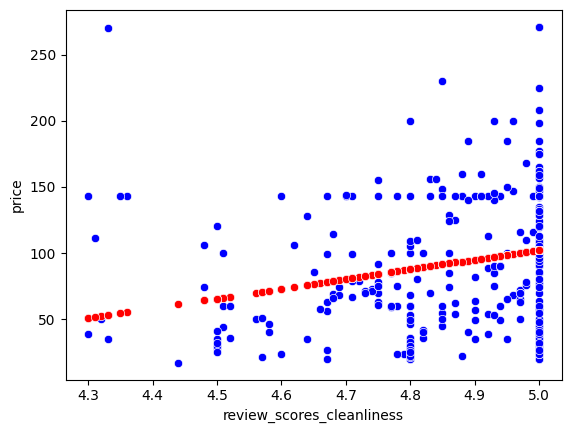

In [237]:
#Visualizamos la gráfica comprativa entre el total real y el total predecido
sns.scatterplot(x='review_scores_cleanliness', y='price', color="blue", data = f3_copy)
sns.scatterplot(x='review_scores_cleanliness', y='Pred_cleanliness', color="red", data = f3_copy)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data = df)

<Axes: xlabel='property_type', ylabel='price'>

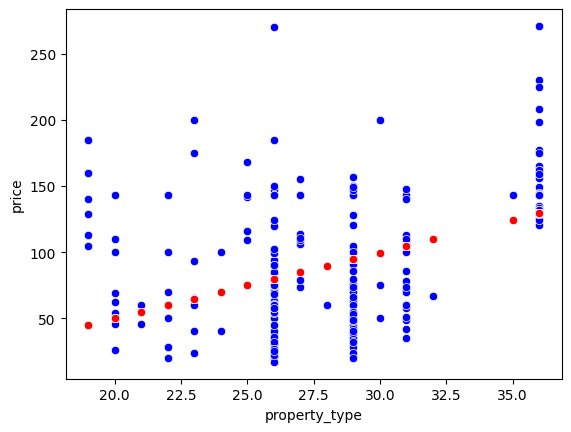

In [238]:
#Visualizamos la gráfica comprativa entre el total real y el total predecido
sns.scatterplot(x='property_type', y='price', color="blue", data = f3_copy)
sns.scatterplot(x='property_type', y='Pred_property', color="red", data = f3_copy)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data = df)

In [239]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter= model.score(X=Vars_Indep, y=Vars_Dep)
coef_Deter

0.0

In [240]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter2= model2.score(X=Vars_Indep2, y=Vars_Dep2)
coef_Deter2

3.905515972413287e-05

In [241]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter3= model3.score(X=Vars_Indep3, y=Vars_Dep3)
coef_Deter3

8.246747992823877e-06

In [242]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter4= model4.score(X=Vars_Indep4, y=Vars_Dep4)
coef_Deter4

0.007520074886488204

In [243]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter5= model5.score(X=Vars_Indep5, y=Vars_Dep5)
coef_Deter5

0.12392476491335802

In [244]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter6= model6.score(X=Vars_Indep6, y=Vars_Dep6)
coef_Deter6

0.0

In [245]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter7= model7.score(X=Vars_Indep7, y=Vars_Dep7)
coef_Deter7

0.0554406302281899

In [246]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter8= model8.score(X=Vars_Indep8, y=Vars_Dep8)
coef_Deter8

0.18482497554004618

In [247]:
#Corroboramos cial es el coeficiente de Correlación de nuestro modelo
coef_Correl= np.sqrt(coef_Deter)
coef_Correl

np.float64(0.0)

In [248]:
#Corroboramos cial es el coeficiente de Correlación de nuestro modelo
coef_Correl2= np.sqrt(coef_Deter2)
coef_Correl2

np.float64(0.006249412750341657)

In [249]:
#Corroboramos cial es el coeficiente de Correlación de nuestro modelo
coef_Correl3= np.sqrt(coef_Deter3)
coef_Correl3

np.float64(0.002871715165684765)

In [250]:
#Corroboramos cial es el coeficiente de Correlación de nuestro modelo
coef_Correl4= np.sqrt(coef_Deter4)
coef_Correl4

np.float64(0.08671836533565543)

In [251]:
#Corroboramos cial es el coeficiente de Correlación de nuestro modelo
coef_Correl5= np.sqrt(coef_Deter5)
coef_Correl5

np.float64(0.3520294943798858)

In [252]:
#Corroboramos cial es el coeficiente de Correlación de nuestro modelo
coef_Correl6= np.sqrt(coef_Deter6)
coef_Correl6

np.float64(0.0)

In [253]:
#Corroboramos cial es el coeficiente de Correlación de nuestro modelo
coef_Correl7= np.sqrt(coef_Deter7)
coef_Correl7

np.float64(0.23545834074882524)

In [254]:
#Corroboramos cial es el coeficiente de Correlación de nuestro modelo
coef_Correl8= np.sqrt(coef_Deter8)
coef_Correl8

np.float64(0.4299127534047416)

In [255]:
#Graficamos todas las despersiones entre todas las variables
#sns.pairplot(f2)

In [256]:
#Analizar categorias de una columna
df6 = f3.groupby(['room_type'])['room_type'].count()
df6

room_type
2    313
Name: room_type, dtype: int64

In [257]:
#Encontramos todas las correlaciones entre las variables
Corr_Factors=f3.corr()
Corr_Factors

,Pred_room,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
Pred_room,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_response_rate,NaN,1.000000,0.224265,0.083930,-0.084494,NaN,0.094261,0.000097,NaN,-0.006249,-0.003671
host_is_superhost,NaN,0.224265,1.000000,-0.016789,-0.188027,NaN,-0.091387,0.035919,NaN,-0.002872,0.138477
host_identity_verified,NaN,0.083930,-0.016789,1.000000,0.081495,NaN,0.107513,-0.051476,NaN,0.086718,-0.070115
property_type,NaN,-0.084494,-0.188027,0.081495,1.000000,NaN,0.400714,0.176339,NaN,0.429913,0.147808
room_type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
instant_bookable,NaN,0.094261,-0.091387,0.107513,0.400714,NaN,1.000000,0.291357,NaN,0.352029,0.015830
accommodates,NaN,0.000097,0.035919,-0.051476,0.176339,NaN,0.291357,1.000000,NaN,0.457406,0.004315
bathrooms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,NaN,-0.006249,-0.002872,0.086718,0.429913,NaN,0.352029,0.457406,NaN,1.000000,0.235458


In [258]:
#Encontramos todas las correlaciones entre las variables
Corr_Factors_pred=f3_copy.corr()
Corr_Factors_pred

,Pred_property,Pred_cleanliness,Pred_bathrooms,Pred_bookable,Pred_identity,Pred_superhost,Pred_response,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
Pred_property,1.000000,0.147808,NaN,0.400714,0.081495,0.188027,0.084494,-0.084494,-0.188027,0.081495,1.000000,NaN,0.400714,0.176339,NaN,0.429913,0.147808
Pred_cleanliness,0.147808,1.000000,NaN,0.015830,-0.070115,-0.138477,0.003671,-0.003671,0.138477,-0.070115,0.147808,NaN,0.015830,0.004315,NaN,0.235458,1.000000
Pred_bathrooms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pred_bookable,0.400714,0.015830,NaN,1.000000,0.107513,0.091387,-0.094261,0.094261,-0.091387,0.107513,0.400714,NaN,1.000000,0.291357,NaN,0.352029,0.015830
Pred_identity,0.081495,-0.070115,NaN,0.107513,1.000000,0.016789,-0.083930,0.083930,-0.016789,1.000000,0.081495,NaN,0.107513,-0.051476,NaN,0.086718,-0.070115
Pred_superhost,0.188027,-0.138477,NaN,0.091387,0.016789,1.000000,0.224265,-0.224265,-1.000000,0.016789,0.188027,NaN,0.091387,-0.035919,NaN,0.002872,-0.138477
Pred_response,0.084494,0.003671,NaN,-0.094261,-0.083930,0.224265,1.000000,-1.000000,-0.224265,-0.083930,0.084494,NaN,-0.094261,-0.000097,NaN,0.006249,0.003671
host_response_rate,-0.084494,-0.003671,NaN,0.094261,0.083930,-0.224265,-1.000000,1.000000,0.224265,0.083930,-0.084494,NaN,0.094261,0.000097,NaN,-0.006249,-0.003671
host_is_superhost,-0.188027,0.138477,NaN,-0.091387,-0.016789,-1.000000,-0.224265,0.224265,1.000000,-0.016789,-0.188027,NaN,-0.091387,0.035919,NaN,-0.002872,0.138477
host_identity_verified,0.081495,-0.070115,NaN,0.107513,1.000000,0.016789,-0.083930,0.083930,-0.016789,1.000000,0.081495,NaN,0.107513,-0.051476,NaN,0.086718,-0.070115


In [259]:
#Encontramos el valor de todas las correlaciones entre las variables
Corr_Factors1=abs(Corr_Factors)
Corr_Factors1

,Pred_room,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
Pred_room,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_response_rate,NaN,1.000000,0.224265,0.083930,0.084494,NaN,0.094261,0.000097,NaN,0.006249,0.003671
host_is_superhost,NaN,0.224265,1.000000,0.016789,0.188027,NaN,0.091387,0.035919,NaN,0.002872,0.138477
host_identity_verified,NaN,0.083930,0.016789,1.000000,0.081495,NaN,0.107513,0.051476,NaN,0.086718,0.070115
property_type,NaN,0.084494,0.188027,0.081495,1.000000,NaN,0.400714,0.176339,NaN,0.429913,0.147808
room_type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
instant_bookable,NaN,0.094261,0.091387,0.107513,0.400714,NaN,1.000000,0.291357,NaN,0.352029,0.015830
accommodates,NaN,0.000097,0.035919,0.051476,0.176339,NaN,0.291357,1.000000,NaN,0.457406,0.004315
bathrooms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,NaN,0.006249,0.002872,0.086718,0.429913,NaN,0.352029,0.457406,NaN,1.000000,0.235458


In [260]:
#Encontramos el valor de todas las correlaciones entre las variables
Corr_Factors1_pred=abs(Corr_Factors_pred)
Corr_Factors1_pred

,Pred_property,Pred_cleanliness,Pred_bathrooms,Pred_bookable,Pred_identity,Pred_superhost,Pred_response,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
Pred_property,1.000000,0.147808,NaN,0.400714,0.081495,0.188027,0.084494,0.084494,0.188027,0.081495,1.000000,NaN,0.400714,0.176339,NaN,0.429913,0.147808
Pred_cleanliness,0.147808,1.000000,NaN,0.015830,0.070115,0.138477,0.003671,0.003671,0.138477,0.070115,0.147808,NaN,0.015830,0.004315,NaN,0.235458,1.000000
Pred_bathrooms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pred_bookable,0.400714,0.015830,NaN,1.000000,0.107513,0.091387,0.094261,0.094261,0.091387,0.107513,0.400714,NaN,1.000000,0.291357,NaN,0.352029,0.015830
Pred_identity,0.081495,0.070115,NaN,0.107513,1.000000,0.016789,0.083930,0.083930,0.016789,1.000000,0.081495,NaN,0.107513,0.051476,NaN,0.086718,0.070115
Pred_superhost,0.188027,0.138477,NaN,0.091387,0.016789,1.000000,0.224265,0.224265,1.000000,0.016789,0.188027,NaN,0.091387,0.035919,NaN,0.002872,0.138477
Pred_response,0.084494,0.003671,NaN,0.094261,0.083930,0.224265,1.000000,1.000000,0.224265,0.083930,0.084494,NaN,0.094261,0.000097,NaN,0.006249,0.003671
host_response_rate,0.084494,0.003671,NaN,0.094261,0.083930,0.224265,1.000000,1.000000,0.224265,0.083930,0.084494,NaN,0.094261,0.000097,NaN,0.006249,0.003671
host_is_superhost,0.188027,0.138477,NaN,0.091387,0.016789,1.000000,0.224265,0.224265,1.000000,0.016789,0.188027,NaN,0.091387,0.035919,NaN,0.002872,0.138477
host_identity_verified,0.081495,0.070115,NaN,0.107513,1.000000,0.016789,0.083930,0.083930,0.016789,1.000000,0.081495,NaN,0.107513,0.051476,NaN,0.086718,0.070115


<Axes: >

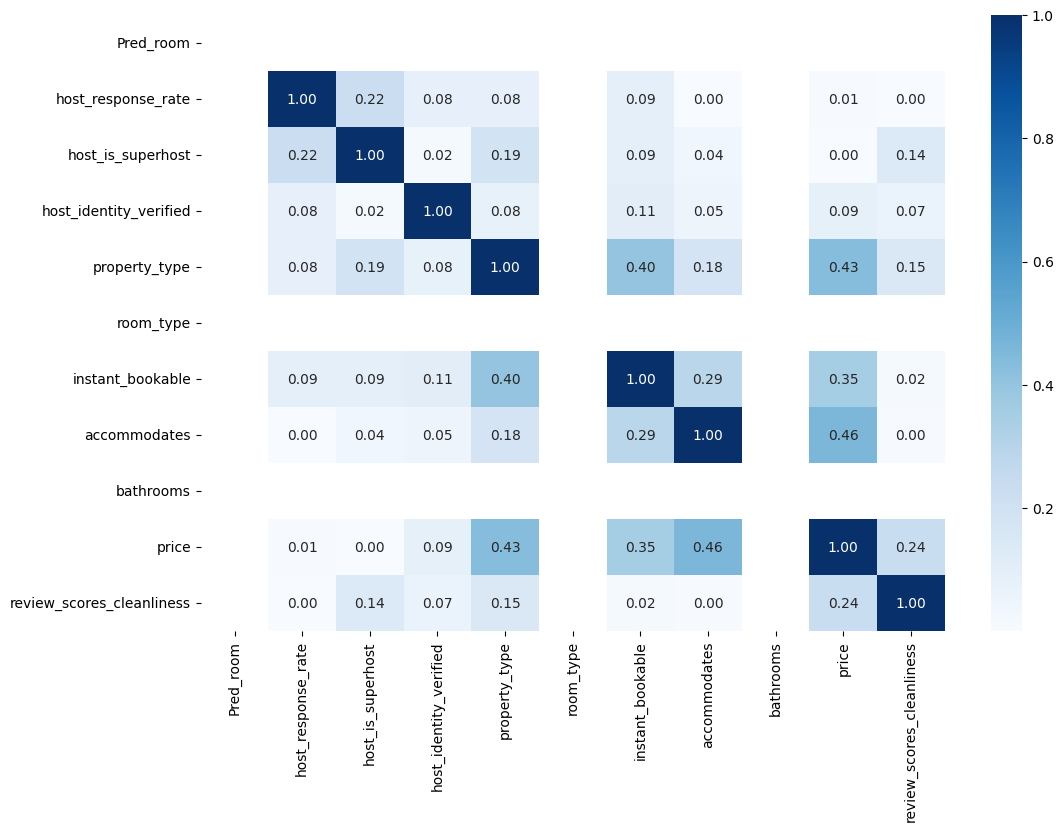

In [261]:
#Ajustamos el mapa de calor de las coeficientes de correlación 
plt.figure(figsize=(12,8))
Heart_Nap = sns.heatmap(Corr_Factors1, cmap= 'Blues', annot=True, fmt=".2f")
Heart_Nap

<Axes: >

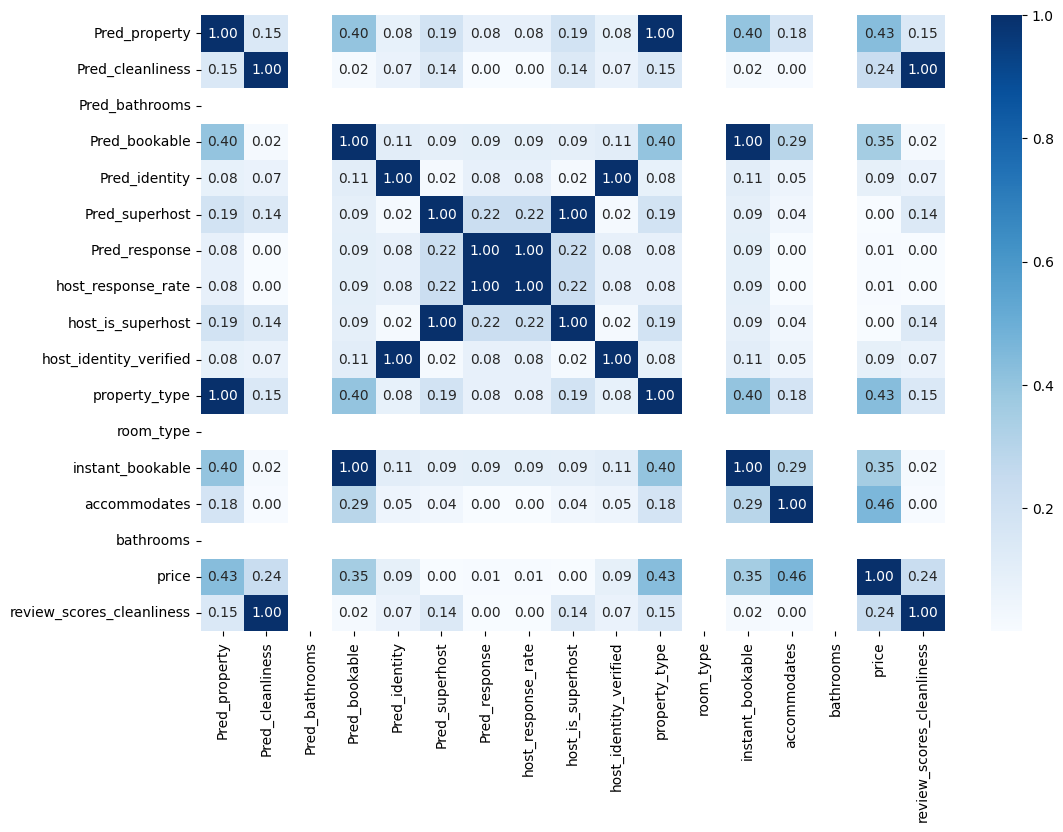

In [262]:
#Ajustamos el mapa de calor de las coeficientes de correlación 
plt.figure(figsize=(12,8))
Heart_Nap = sns.heatmap(Corr_Factors1_pred, cmap= 'Blues', annot=True, fmt=".2f")
Heart_Nap